In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Dataset 2.csv")

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts
8799,25,55,22,33.191011,52.475590,6.727969,32.812965,groundnuts


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8800 non-null   int64  
 1   P            8800 non-null   int64  
 2   K            8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph           8800 non-null   float64
 6   rainfall     8800 non-null   float64
 7   label        8800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 550.1+ KB


In [6]:
data.shape

(8800, 8)

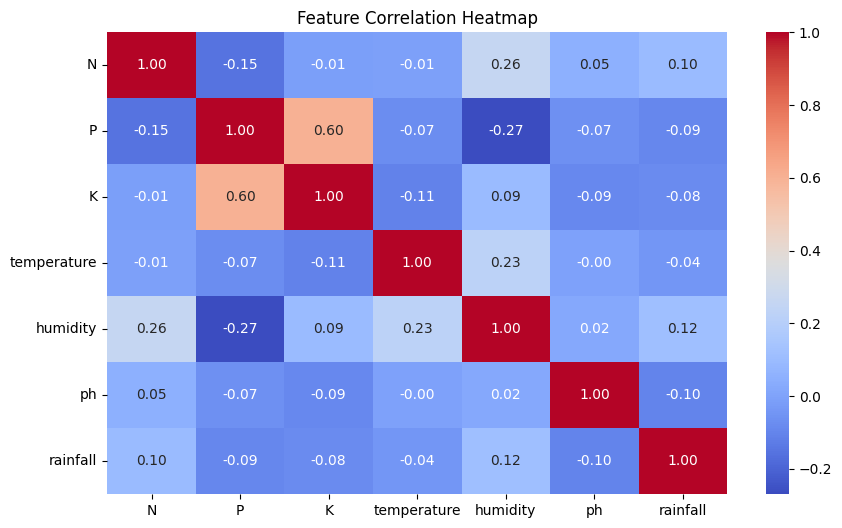

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'groundnuts'],
      dtype=object)

In [9]:
data['label'].value_counts()

label
rice           400
maize          400
chickpea       400
kidneybeans    400
pigeonpeas     400
mothbeans      400
mungbean       400
blackgram      400
lentil         400
pomegranate    400
banana         400
mango          400
grapes         400
watermelon     400
muskmelon      400
orange         400
papaya         400
coconut        400
cotton         400
jute           400
coffee         400
groundnuts     400
Name: count, dtype: int64

🎯 Model Accuracy: 90.91%
❌ Error Rate: 9.09%

📊 Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        85
   blackgram       1.00      1.00      1.00        85
    chickpea       1.00      1.00      1.00        84
     coconut       1.00      1.00      1.00        78
      coffee       1.00      1.00      1.00        84
      cotton       0.96      1.00      0.98        66
      grapes       1.00      1.00      1.00        73
  groundnuts       0.14      0.12      0.13        94
        jute       0.95      1.00      0.98        82
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      1.00      1.00        76
       maize       1.00      0.96      0.98        81
       mango       1.00      1.00      1.00        91
   mothbeans       0.13      0.15      0.14        82
    mungbean       1.00      1.00      1.00        84
   muskmelon       1.00      1.00      1.00        77
      ora

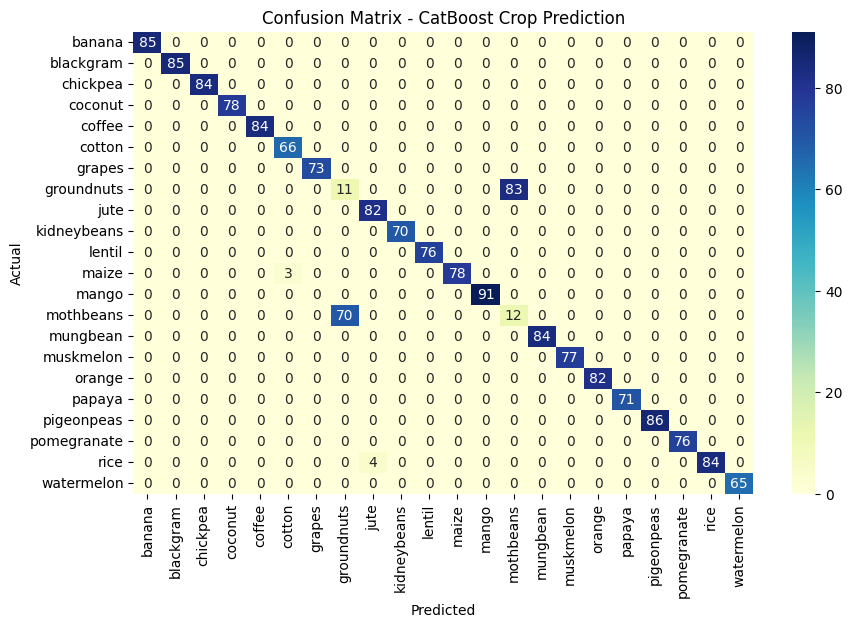

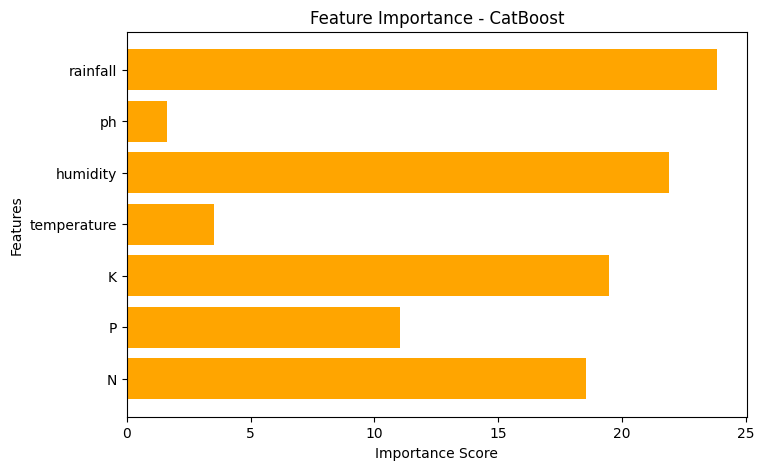

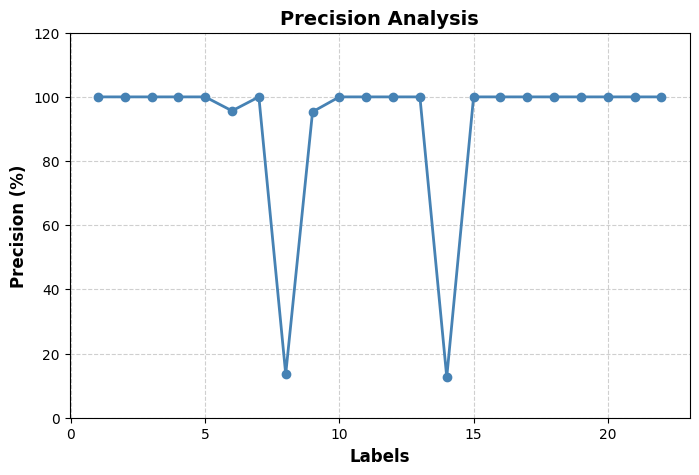

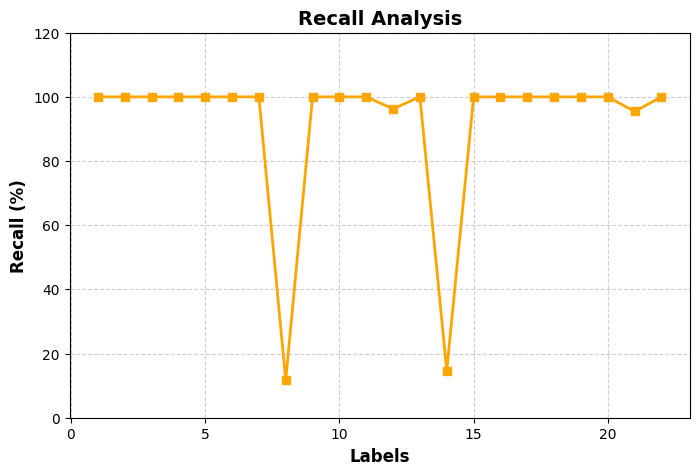

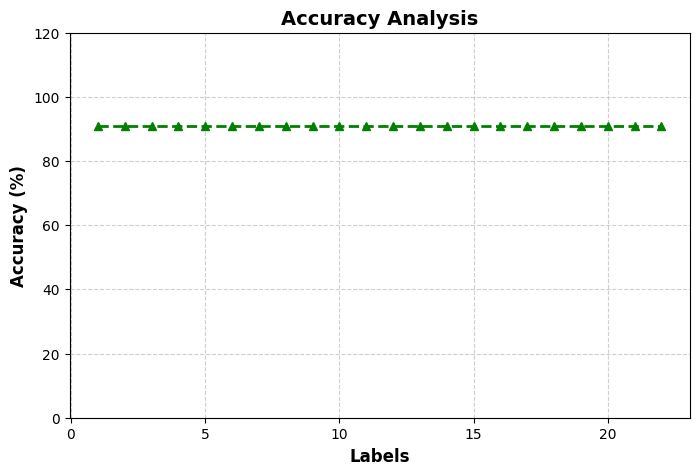

✅ Overall Accuracy of Model: 90.91%

--- 🌿 Enter Soil and Climate Details ---


Enter N:  80
Enter P:  90
Enter K:  60
Enter temperature:  23
Enter humidity:  90
Enter ph:  6
Enter rainfall:  230



✅ Recommended Crop: rice


C:\Users\yogesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
### import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset
data = pd.read_csv("Dataset 2.csv")

# 2️⃣ Separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 3️⃣ Encode target labels (crop names)
le = LabelEncoder()
y = le.fit_transform(y)

# 4️⃣ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Initialize and train CatBoost model
model = CatBoostClassifier(
    iterations=300,        # number of trees
    learning_rate=0.1,     # step size
    depth=6,               # tree depth
    loss_function='MultiClass',
    verbose=False,         # hide training logs
    random_state=42
)
model.fit(X_train, y_train)

# 6️⃣ Predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"🎯 Model Accuracy: {accuracy*100:.2f}%")
print(f"❌ Error Rate: {error_rate*100:.2f}%\n")
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 8️⃣ Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - CatBoost Crop Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9️⃣ Feature Importance Plot
feature_importance = model.get_feature_importance(Pool(X_train, y_train))
plt.figure(figsize=(8,5))
plt.barh(X.columns, feature_importance, color='orange')
plt.title("Feature Importance - CatBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()




#  Get classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
labels = range(1, len(le.classes_) + 1)

# Extract per-class metrics
precision = [report[str(i)]['precision'] * 100 for i in range(len(le.classes_))]
recall = [report[str(i)]['recall'] * 100 for i in range(len(le.classes_))]
accuracy_value = accuracy_score(y_test, y_pred) * 100
accuracy = [accuracy_value] * len(le.classes_)

# Get crop names for x-axis
crop_names = le.classes_

#  Plot Precision Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, precision, marker='o', color='steelblue', linewidth=2)
plt.title("Precision Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Precision (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# Plot Recall Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, recall, marker='s', color='orange', linewidth=2)
plt.title("Recall Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Recall (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#   Plot Accuracy Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracy, linestyle='--', color='green', linewidth=2, marker='^')
plt.title("Accuracy Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ Overall Accuracy of Model: {accuracy_value:.2f}%")

# 🔟 🌱 User Input Prediction
print("\n--- 🌿 Enter Soil and Climate Details ---")
user_input = []
for col in X.columns:
    value = float(input(f"Enter {col}: "))
    user_input.append(value)

# Convert to DataFrame
user_df = pd.DataFrame([user_input], columns=X.columns)

# Predict crop
predicted_crop = le.inverse_transform(model.predict(user_df).astype(int))[0]
print("\n✅ Recommended Crop:", predicted_crop)